# Applied various algorithms like PCA and t-SNE to analyze the Credit Card Dataset. Used K-means, hierarchical clustering, DBSCAN, and Agglomerative Clustering to identify patterns.





# Import needed libraries

In [1]:
pip install plotly

In [2]:
import pandas as pd  # Importing pandas for data manipulation
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
from sklearn.cluster import KMeans  # Importing KMeans for clustering
import numpy as np  # Importing numpy for numerical operations
from scipy.spatial.distance import cdist  # Importing cdist for distance computations
import math  # Importing math for mathematical operations
from sklearn.metrics import silhouette_score  # Importing silhouette_score for clustering evaluation
from sklearn.preprocessing import MinMaxScaler  # Importing MinMaxScaler for data scaling
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for data scaling
from sklearn.preprocessing import MaxAbsScaler  # Importing MaxAbsScaler for data scaling
from sklearn.preprocessing import RobustScaler  # Importing RobustScaler for data scaling
from sklearn.preprocessing import QuantileTransformer  # Importing QuantileTransformer for data scaling
from sklearn.preprocessing import PowerTransformer  # Importing PowerTransformer for data scaling
from sklearn.preprocessing import Normalizer  # Importing Normalizer for data scaling
from sklearn.cluster import DBSCAN  # Importing DBSCAN for density-based clustering
from sklearn.decomposition import PCA  # Importing PCA for dimensionality reduction
from sklearn.manifold import TSNE  # Importing TSNE for dimensionality reduction
from scipy.cluster.hierarchy import dendrogram, linkage  # Importing dendrogram and linkage for hierarchical clustering
import plotly.express as px  # Importing plotly for interactive visualizations
from sklearn.preprocessing import FunctionTransformer  # Importing FunctionTransformer for custom data transformations

# Read the dataset
Downloaded from: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download

Sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
data_path = '/content/drive/CC GENERAL.csv'
df = pd.read_csv('/content/drive/MyDrive/CC GENERAL.csv')
print('The shape of the dataset is: ', df.shape)

The shape of the dataset is:  (8950, 18)


# Data investigation

In [5]:
#show basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
#count missing values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
#check for duplicates
print("duplicates in data: ",df.duplicated().sum())

duplicates in data:  0


# Conclusion 1
    - data types: float64(14), int64(3), object(1)
    - columns with null values: CREDIT_LIMIT(1), MINIMUM_PAYMENTS(313)
    - no duplicates

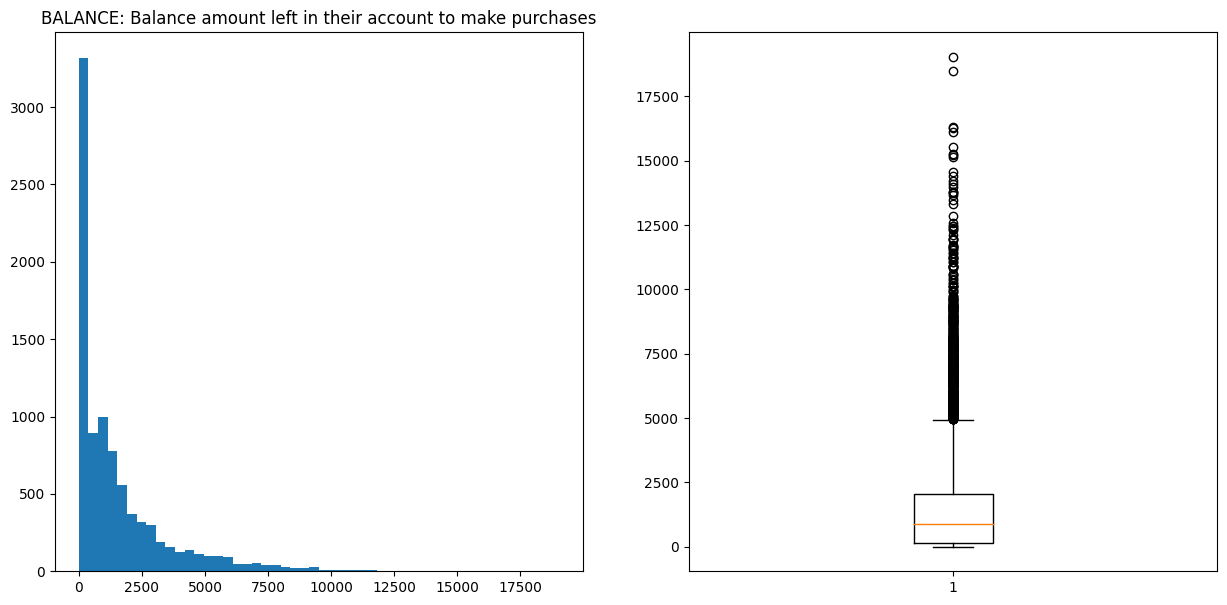

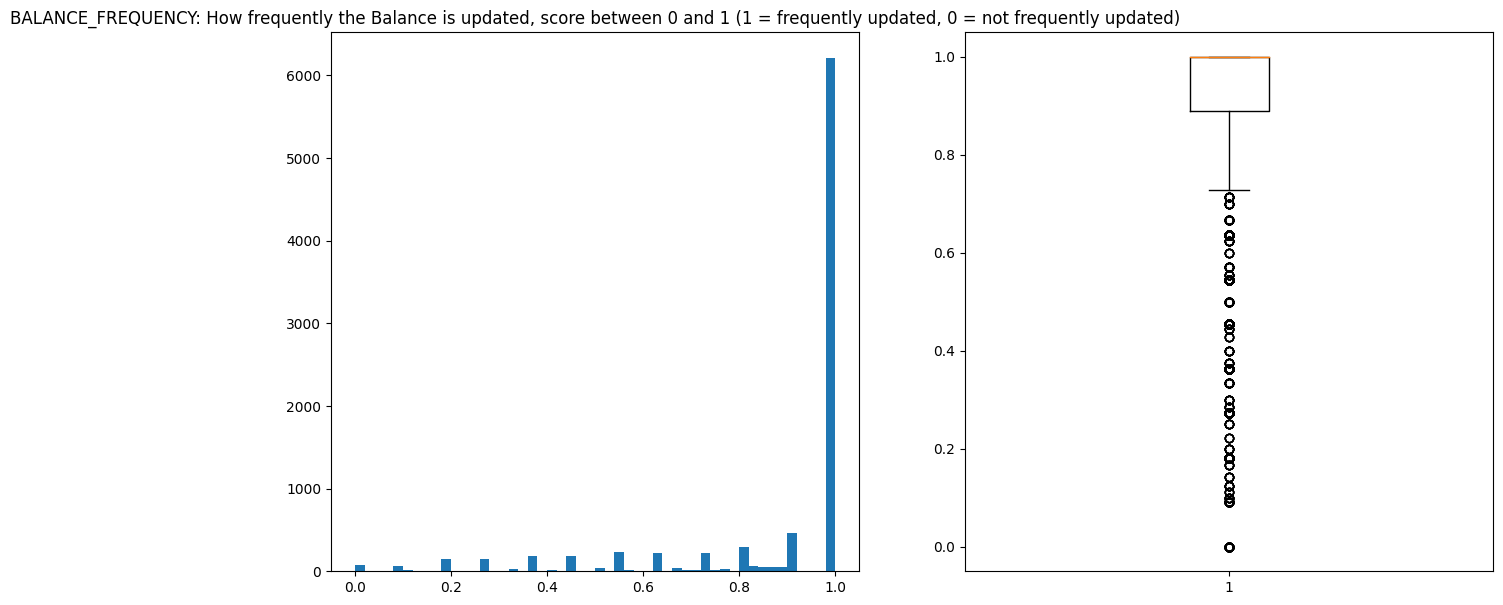

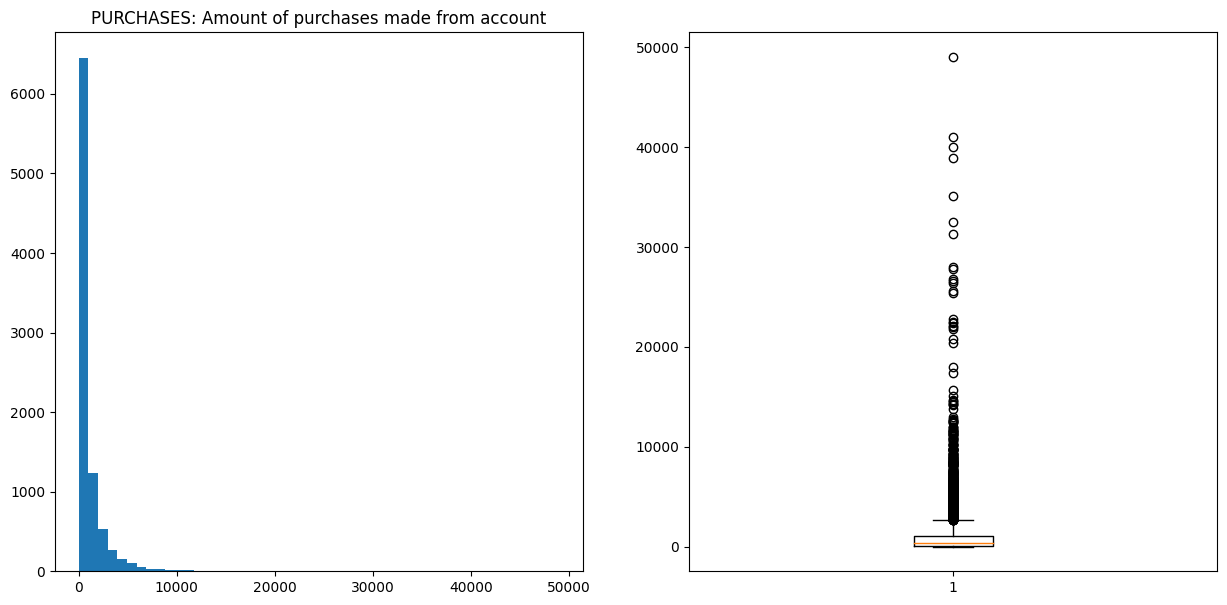

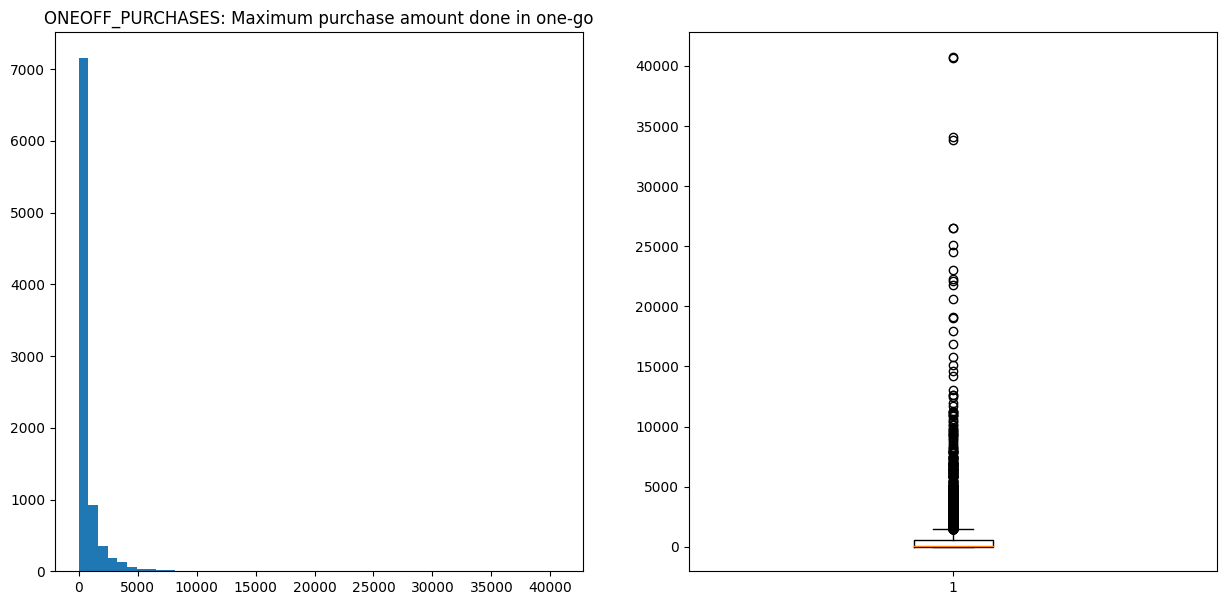

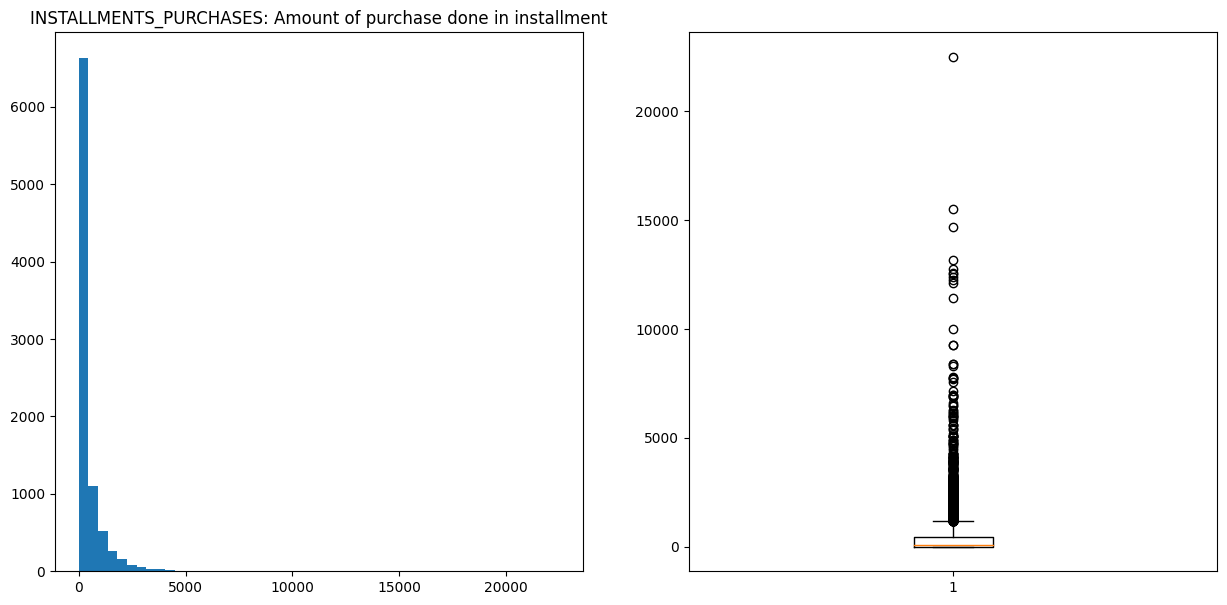

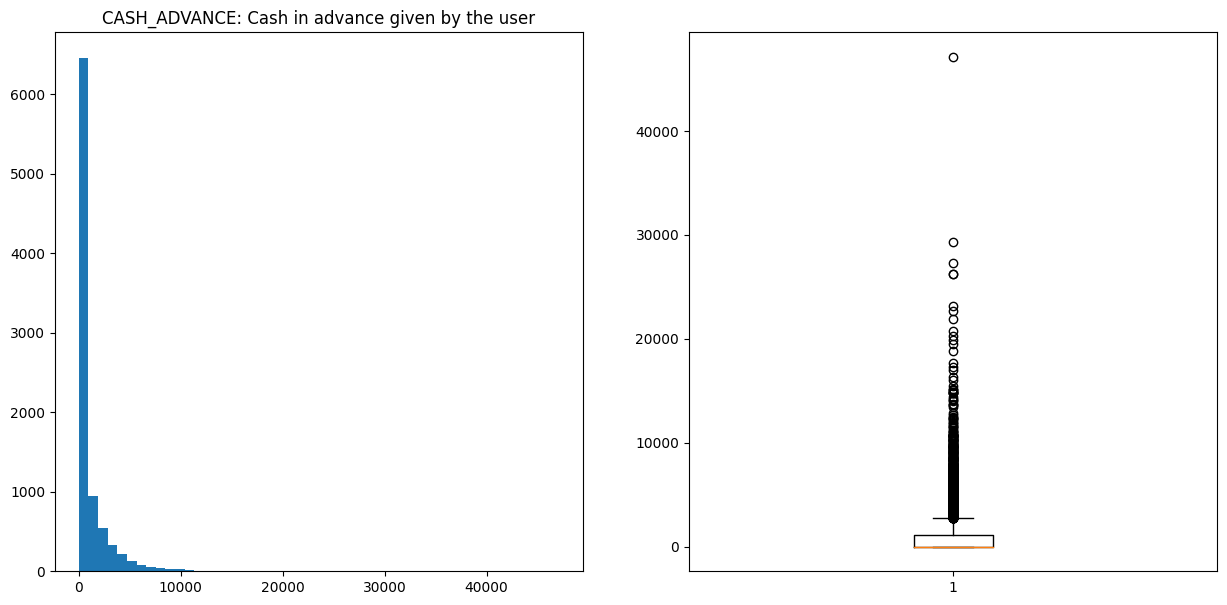

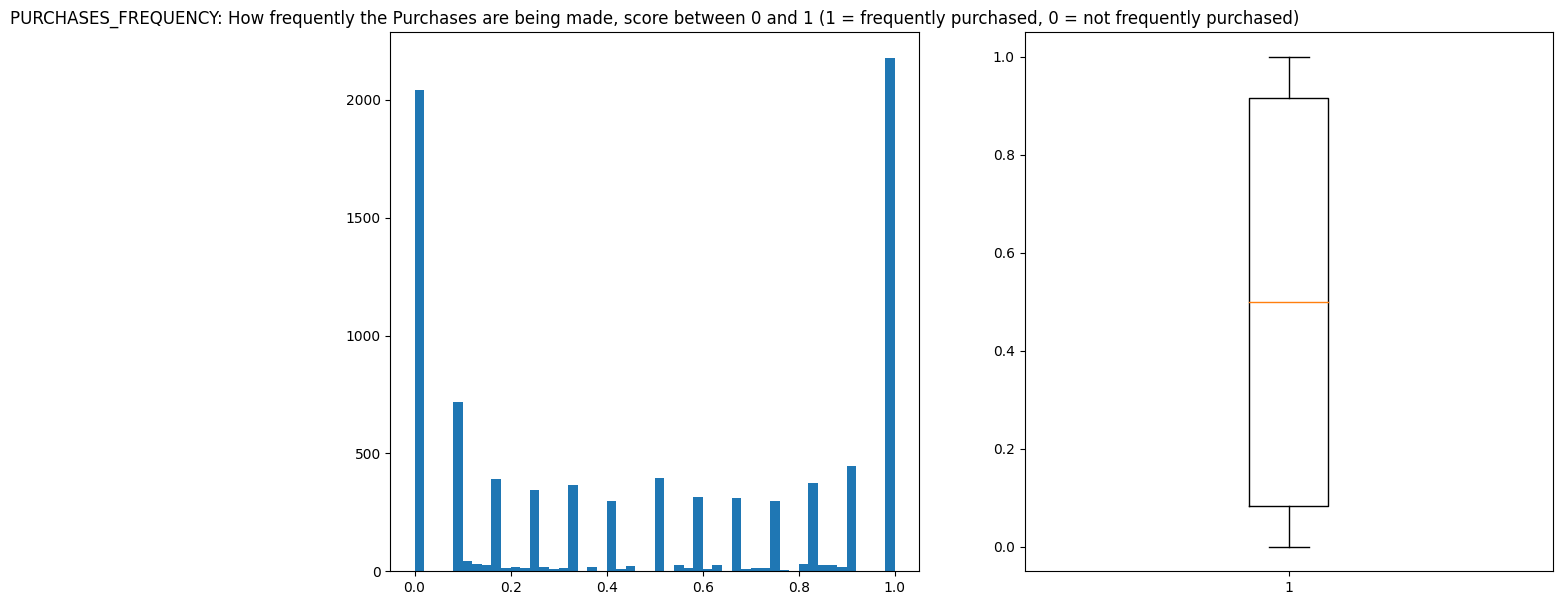

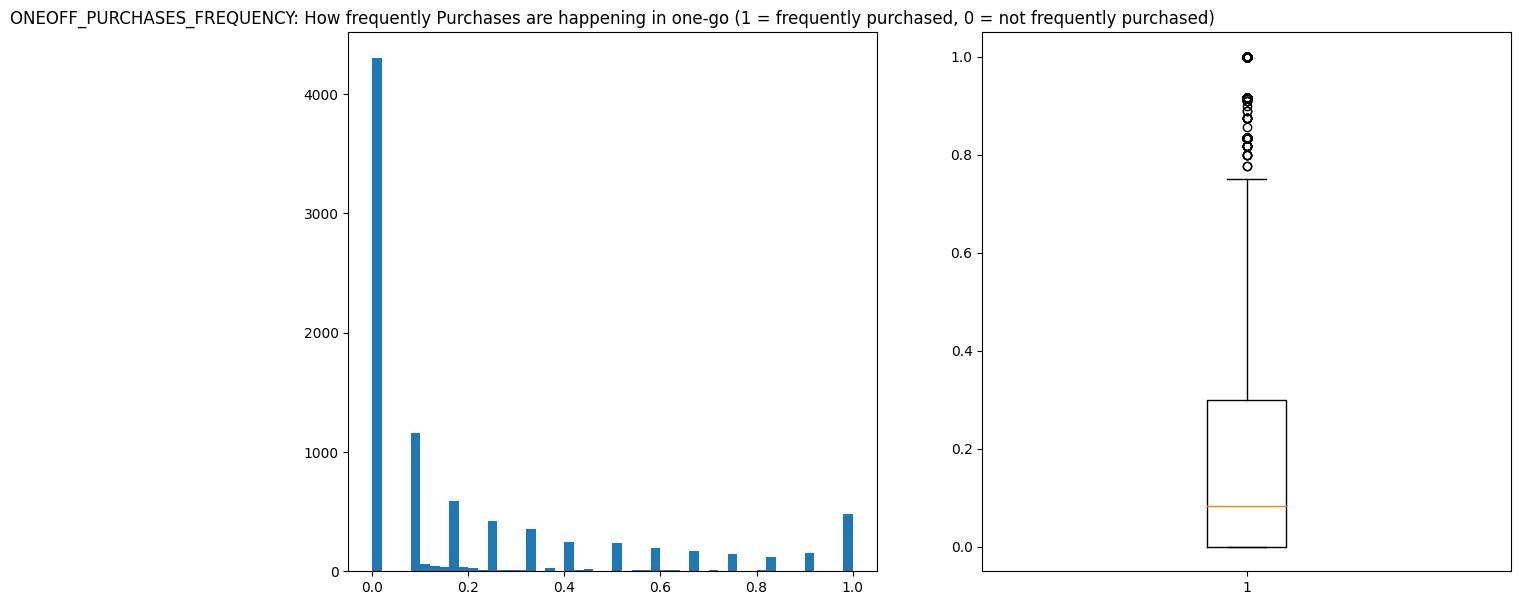

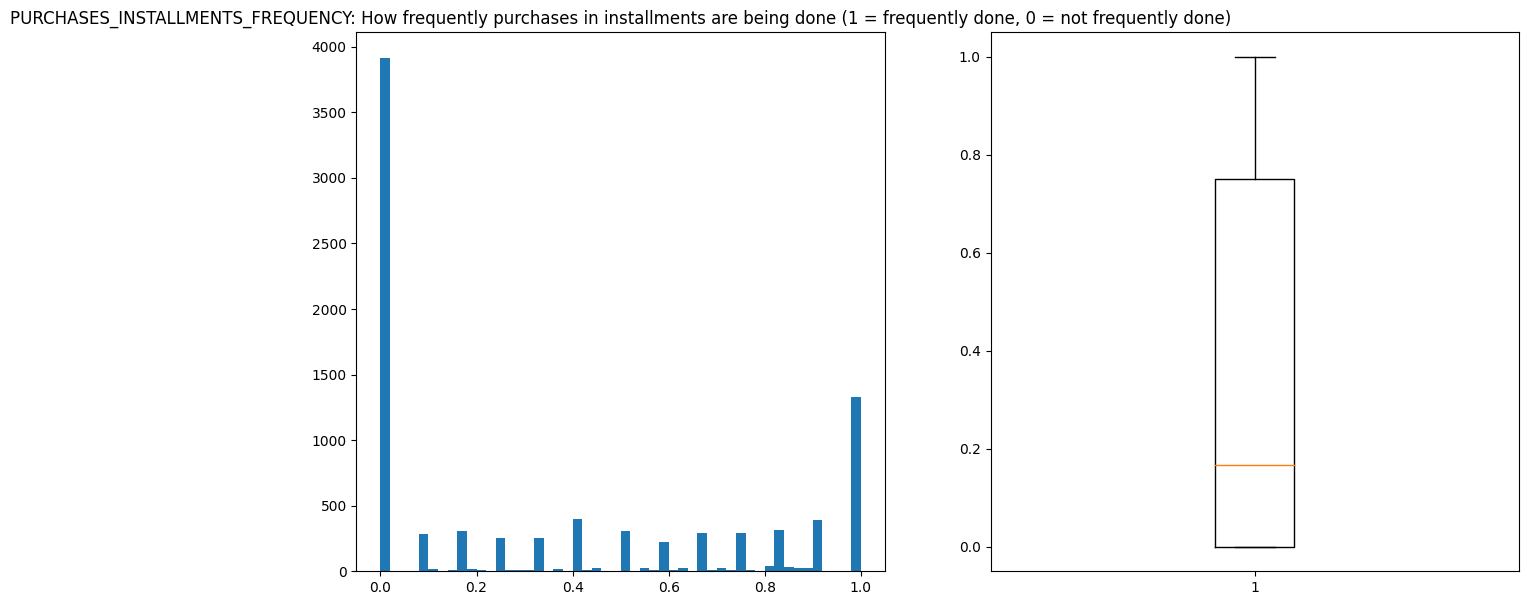

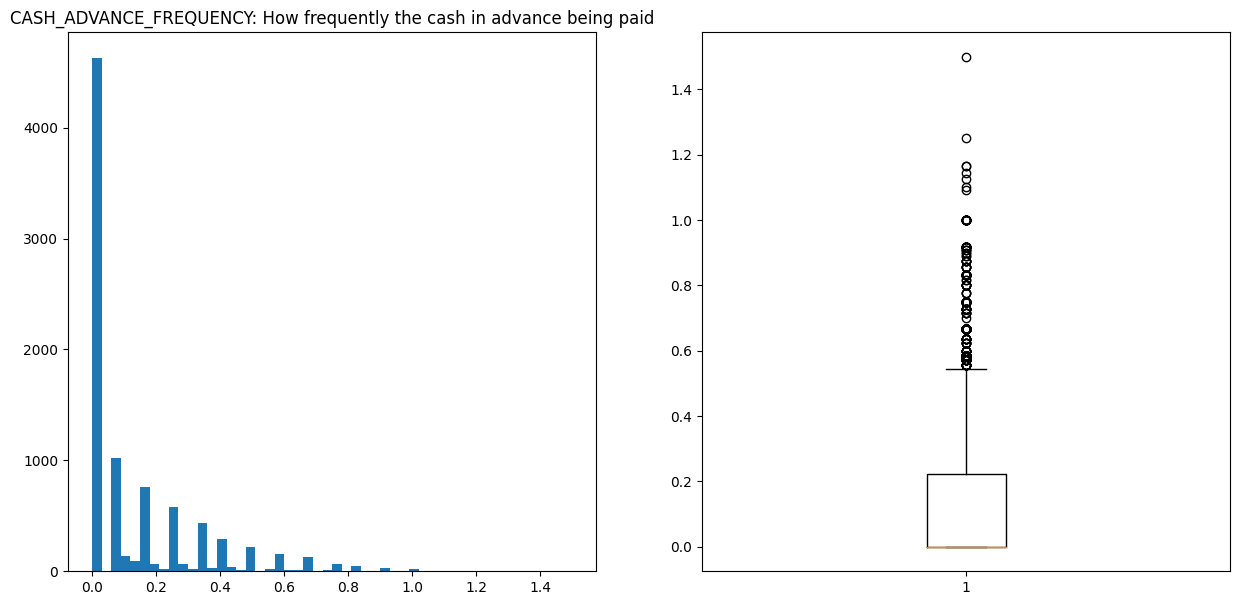

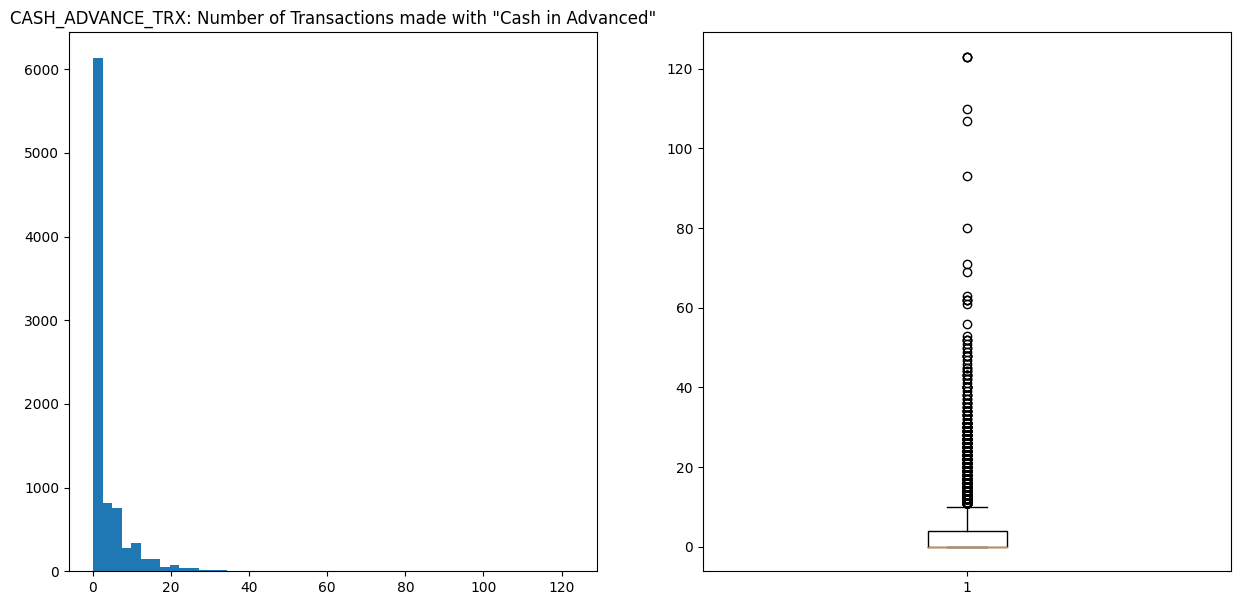

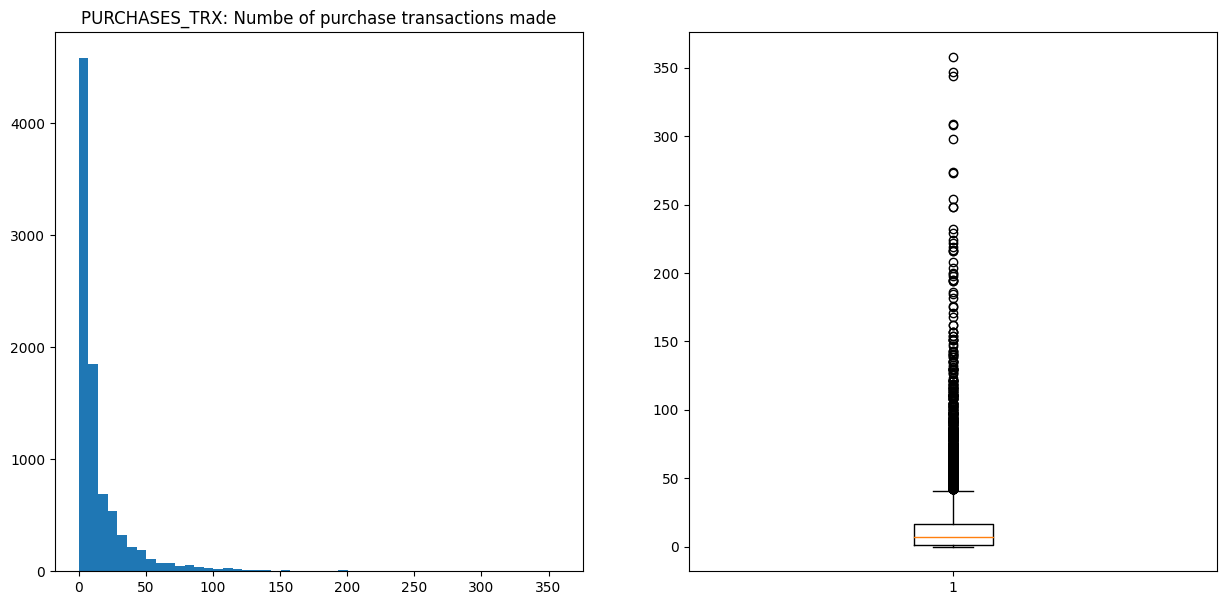

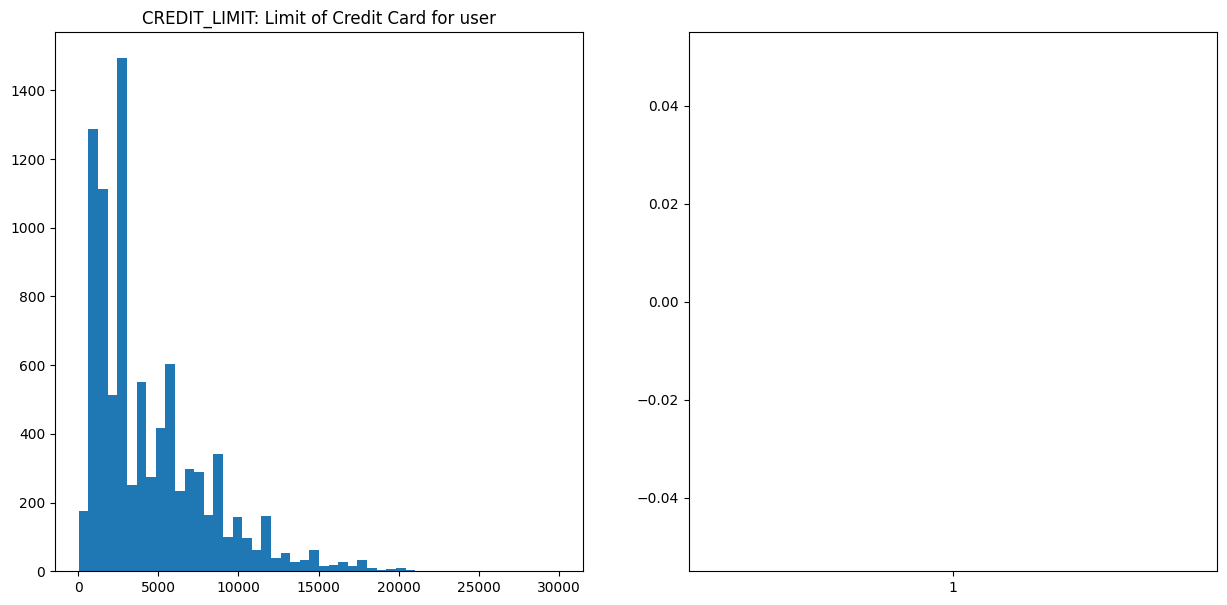

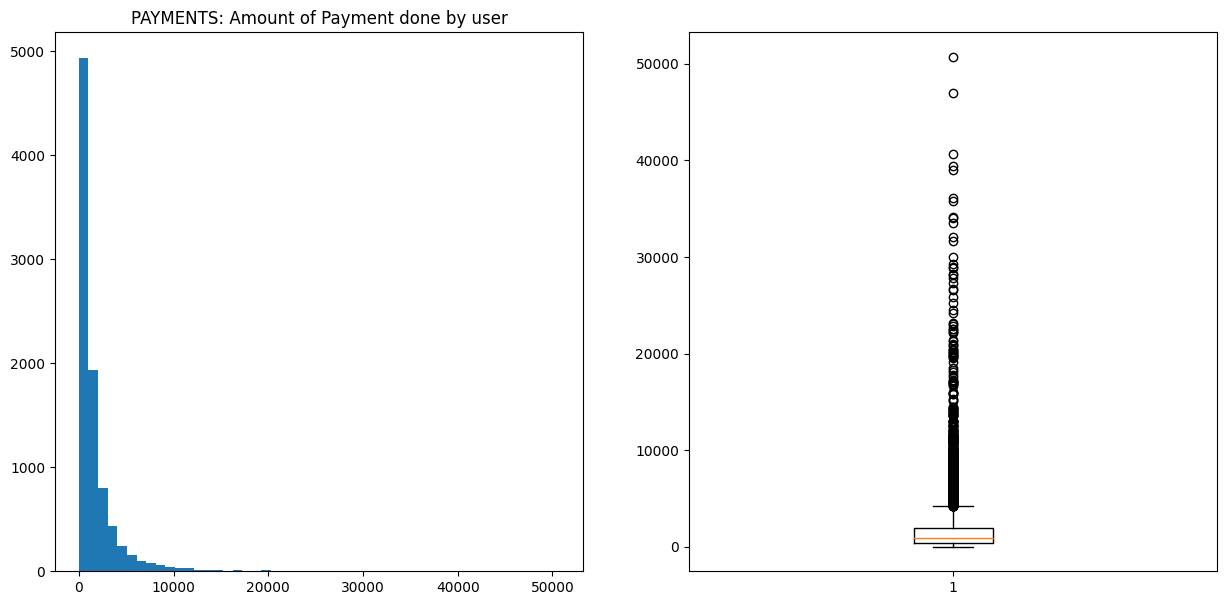

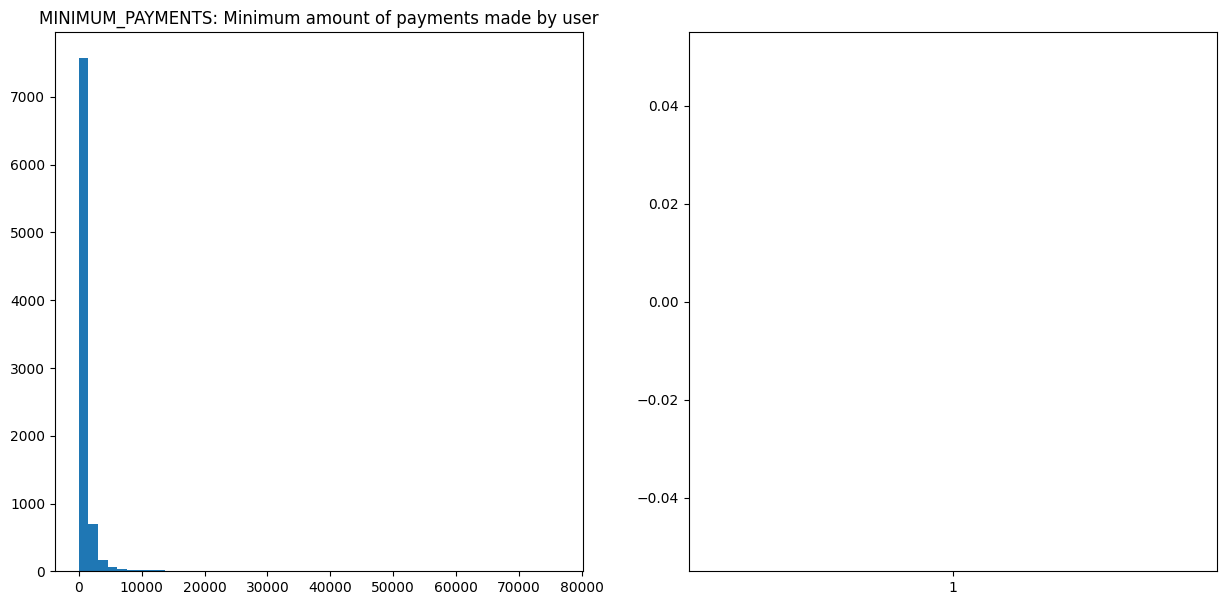

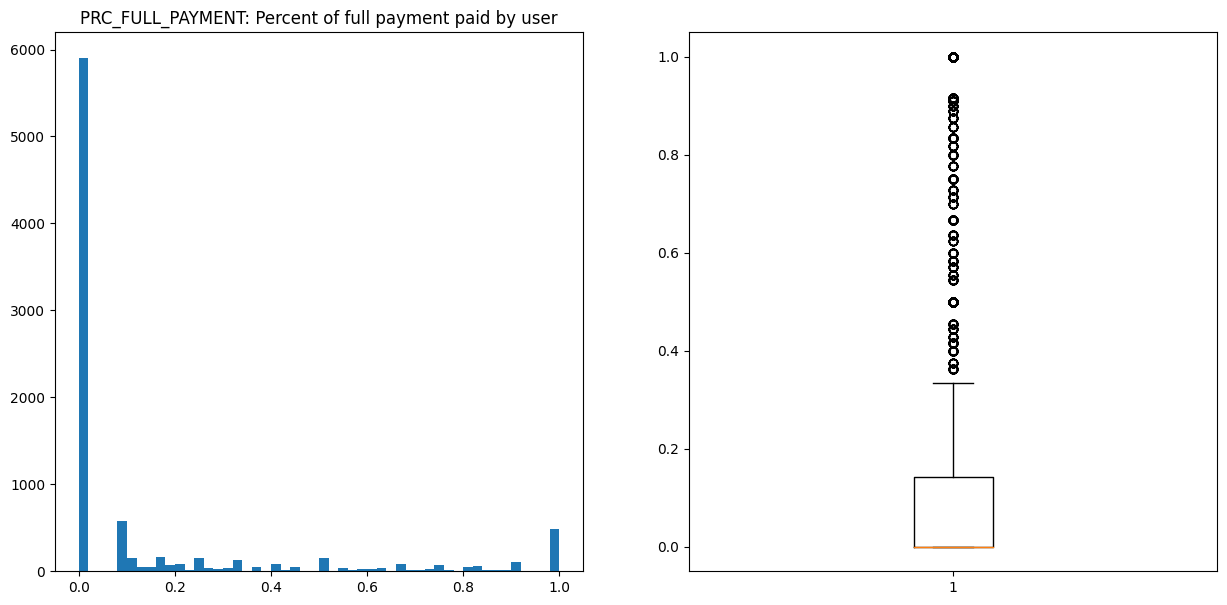

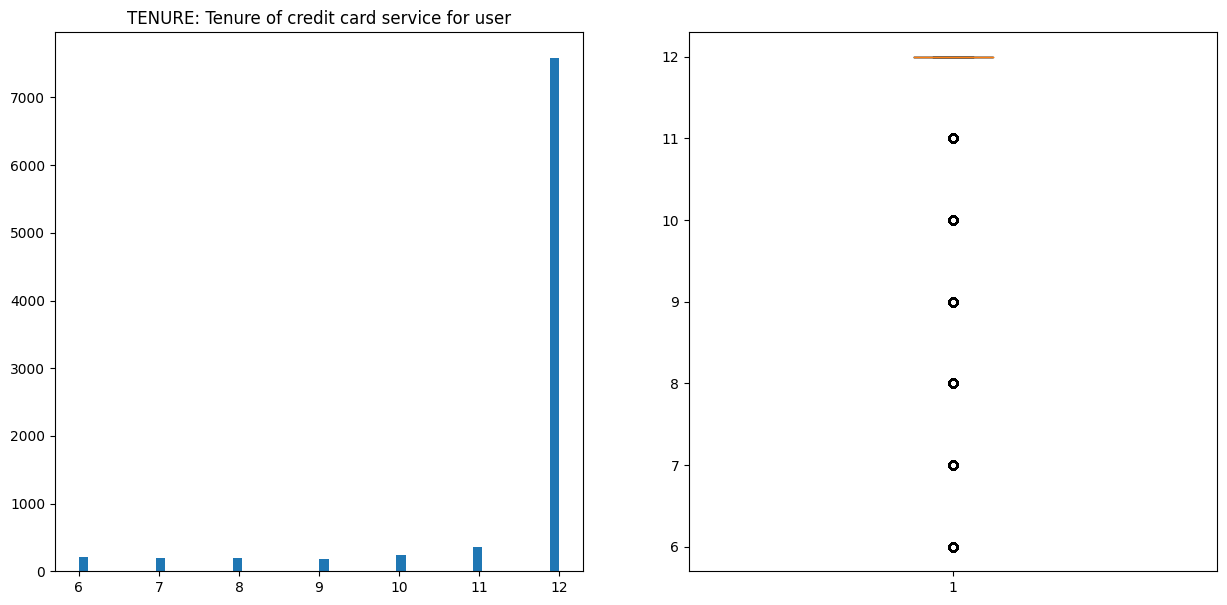

In [8]:
#distibution
columns=['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES',
         'INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY',
         'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT',
         'PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']

discriptions=['Balance amount left in their account to make purchases',
            'How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)',
            'Amount of purchases made from account',
            'Maximum purchase amount done in one-go',
            'Amount of purchase done in installment',
            'Cash in advance given by the user',
            'How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)',
            'How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)',
            'How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)',
            'How frequently the cash in advance being paid',
            'Number of Transactions made with "Cash in Advanced"',
            'Numbe of purchase transactions made',
            'Limit of Credit Card for user',
            'Amount of Payment done by user',
            'Minimum amount of payments made by user',
            'Percent of full payment paid by user',
            'Tenure of credit card service for user']
for i in range(len(columns)):
    plt.figure(figsize=(15,7))
    #distribution
    plt.subplot(1, 2, 1)
    plt.title(columns[i]+": "+discriptions[i])
    plt.hist(df[columns[i]],50)
    #check for outliers
    plt.subplot(1, 2, 2)
    plt.boxplot(df[columns[i]])
    plt.show()


# Conclusion 2

    -('BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CASH_ADVANCE_FREQUENCY',
      'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS') columns are highly right-skewed.
      
    - 'BALANCE_FREQUENCY' left-skewed -> most balances are ubdated frequently.
    
    - 'PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PRC_FULL_PAYMENT' have 2 peeks.
    
    - 'TENURE' -> most customers prefer 12 months tenure compared to other options.
    
    - most columns have many outliers
    
    - all values starts from 0 (no columns has negative values)
    
    
    
    

# Data Preprocessing


In [28]:
#drop CUST_ID column because it doesn`t matter
df=df.drop(['CUST_ID'], axis=1)
#check after dropping
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [10]:
#null values
#columns with null values: CREDIT_LIMIT(1), MINIMUM_PAYMENTS(313)
#check percentage of null
round(df.isnull().sum() * 100 / len(df),2)

BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [ ]:
#just 3.5% -> can be dropped
df=df.dropna()
#check after dropping
round(df.isnull().sum() * 100 / len(df),2)

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [29]:
#another solution
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(0)
#drop the row that has null in CREDIT_LIMIT
df=df.dropna()
#check after dropping
print('The shape of the dataset is: ', df.shape)
round(df.isnull().sum() * 100 / len(df),2)

The shape of the dataset is:  (8949, 17)


BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [12]:
#Visualization
#check with tsne
df_without_transform=np.array(df)
df_without_transform = TSNE(n_components=2).fit_transform(df_without_transform)
tsne_fig = px.scatter(
    x = df_without_transform[:, 0],
    y = df_without_transform[:, 1],
    title = "TSNE before any transformation"
)
tsne_fig.show()

# Feature Transformation

# 1- Feature scaling

In [13]:
#PowerTransformer -> it makes it more Gaussian(normal)
scaler = PowerTransformer(method = 'yeo-johnson').fit(df)
df_power=scaler.transform(df)

In [14]:
#check with tsne
df_power=np.array(df_power)
t = TSNE(n_components=2).fit_transform(df_power)
tsne_fig = px.scatter(
    x = t[:, 0],
    y = t[:, 1],
    title = "TSNE after PowerTransformer"
)
tsne_fig.show()

In [15]:
#Normalizer -> scaling individual samples to have unit norm.
scaler = Normalizer(norm = 'l2')
df_norm=scaler.transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but Normalizer was fitted without feature names



In [16]:
#check with tsne
df_norm=np.array(df)
t = TSNE(n_components=2).fit_transform(df_norm)
tsne_fig = px.scatter(
    x = t[:, 0],
    y = t[:, 1],
    title = "TSNE after Normalizer"
)
tsne_fig.show()

In [17]:
#QuantileTransformer -> converts the variable distribution to a normal distribution and scales it. it also deals with the outliers.
scaler = QuantileTransformer().fit(df)
df_Quantile=scaler.transform(df)

In [18]:
#check with tsne
df_Quantile=np.array(df)
t = TSNE(n_components=2).fit_transform(df_Quantile)
tsne_fig = px.scatter(
    x = t[:, 0],
    y = t[:, 1],
    title = "TSNE after QuantileTransformer"
)
tsne_fig.show()

In [19]:
#StandardScaler -> scales the values such that the mean is 0 and the standard deviation is 1(or the variance).
scaler = StandardScaler().fit(df)
df_Standard=scaler.transform(df)

In [20]:
#check with tsne
df_Standard=np.array(df)
t = TSNE(n_components=2).fit_transform(df_Standard)
tsne_fig = px.scatter(
    x = t[:, 0],
    y = t[:, 1],
    title = "TSNE after StandardScaler"
)
tsne_fig.show()

In [21]:
#MinMaxScaler -> scales all the data between 0 and 1
scaler = MinMaxScaler().fit(df)
df_MinMax=scaler.transform(df)

In [22]:
#check with tsne
df_MinMax=np.array(df_MinMax)
t = TSNE(n_components=2).fit_transform(df_MinMax)
tsne_fig = px.scatter(
    x = t[:, 0],
    y = t[:, 1],
    title = "TSNE after StandardScaler"
)
tsne_fig.show()

In [30]:
#MaxAbsScaler -> takes the absolute maximum value of each column and divides each value in the column by the maximum value.
scaler = MaxAbsScaler().fit(df)
df_MaxAbs=scaler.transform(df)

In [31]:
#check with tsne
df_MaxAbs=np.array(df_MaxAbs)
t = TSNE(n_components=2).fit_transform(df_MaxAbs)
tsne_fig = px.scatter(
    x = t[:, 0],
    y = t[:, 1],
    title = "TSNE after MaxAbsScaler"
)
tsne_fig.show()

In [32]:
#RobustScaler -> is not sensitive to outliers. removes the median from the data, scales the data by the InterQuartile Range(IQR)
scaler = RobustScaler().fit(df)
df_Robust=scaler.transform(df)

In [33]:
#check with tsne
df_Robust=np.array(df_Robust)
t = TSNE(n_components=2).fit_transform(df_Robust)
tsne_fig = px.scatter(
    x = t[:, 0],
    y = t[:, 1],
    title = "TSNE after RobustScaler"
)
tsne_fig.show()

In [34]:
# Log Transform -> convert a skewed distribution to a normal distribution/less-skewed distribution
scaler= FunctionTransformer(np.log1p)
df_log=scaler.transform(df)

In [35]:
#check with tsne
df_log=np.array(df_log)
t = TSNE(n_components=2).fit_transform(df_log)
tsne_fig = px.scatter(
    x = t[:, 0],
    y = t[:, 1],
    title = "TSNE after LogTransformation"
)
tsne_fig.show()

LogTransformation can give best seperation with reasonable number of classes

In [37]:
df= pd.DataFrame(df_log)

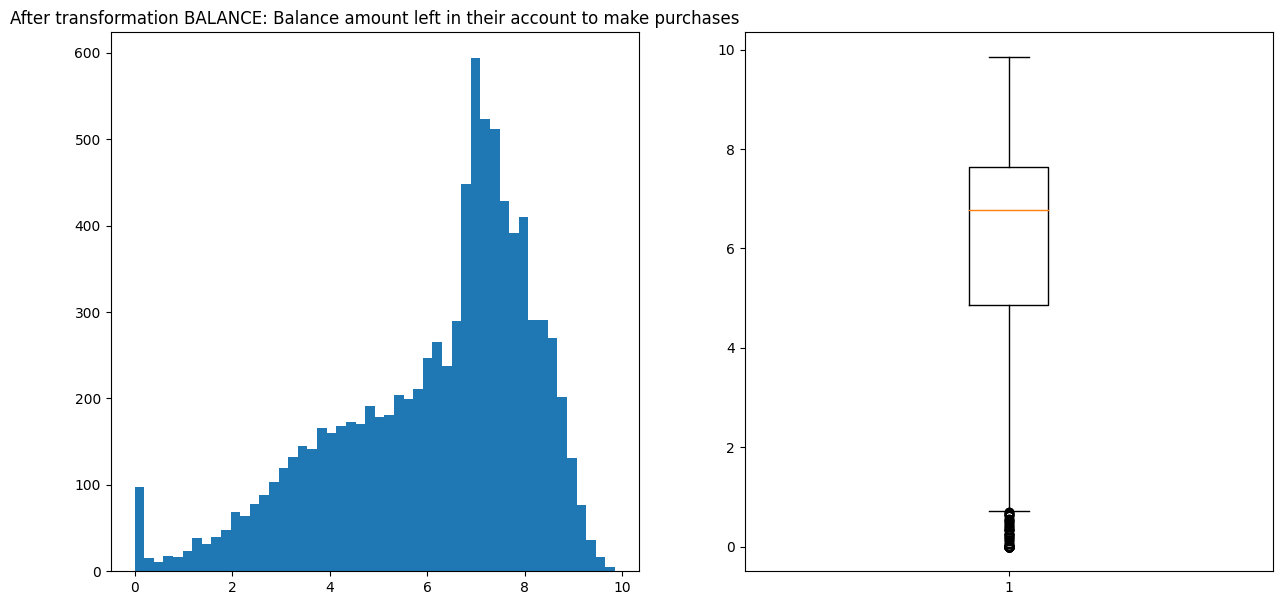

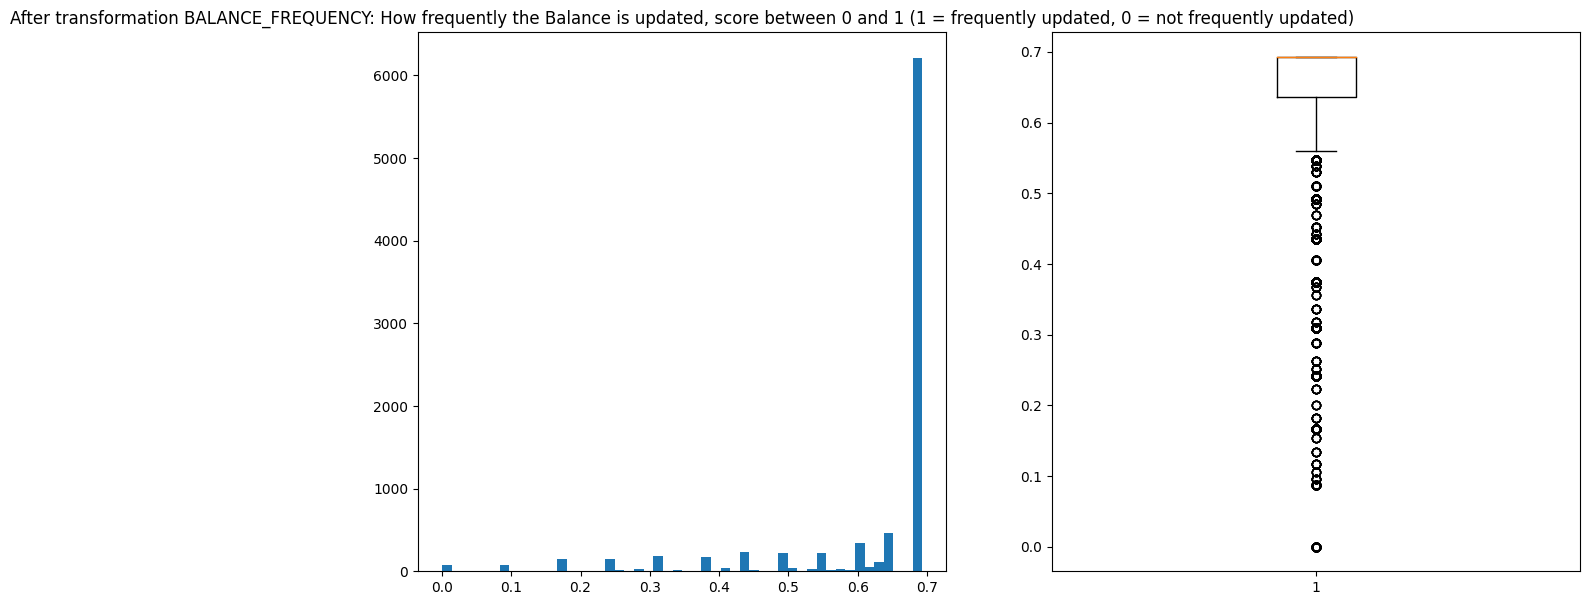

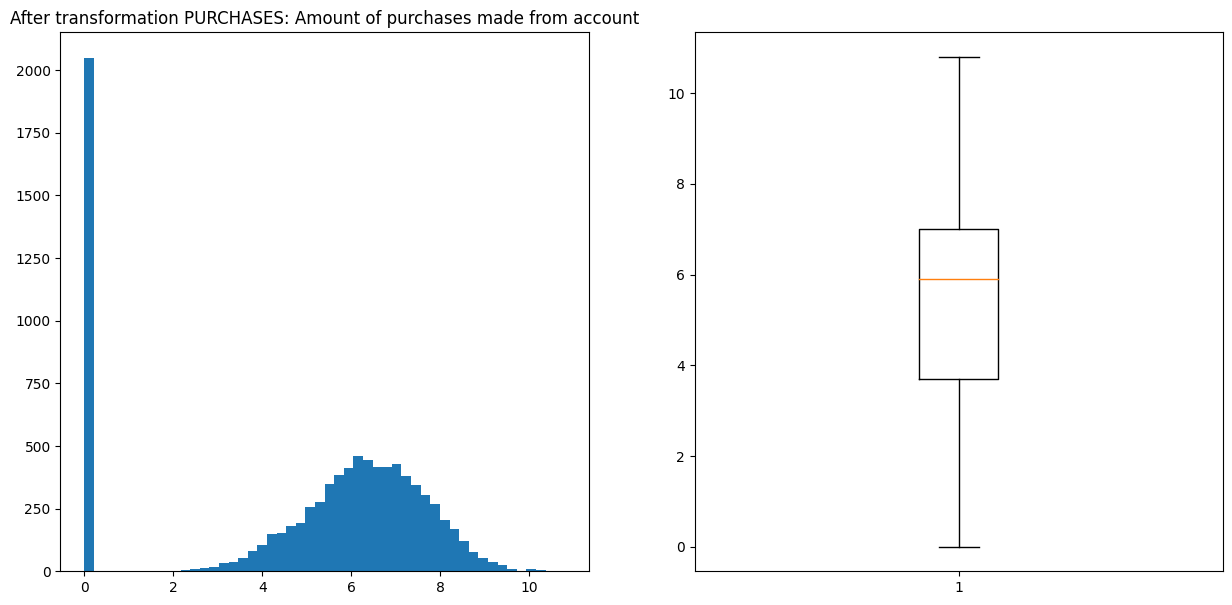

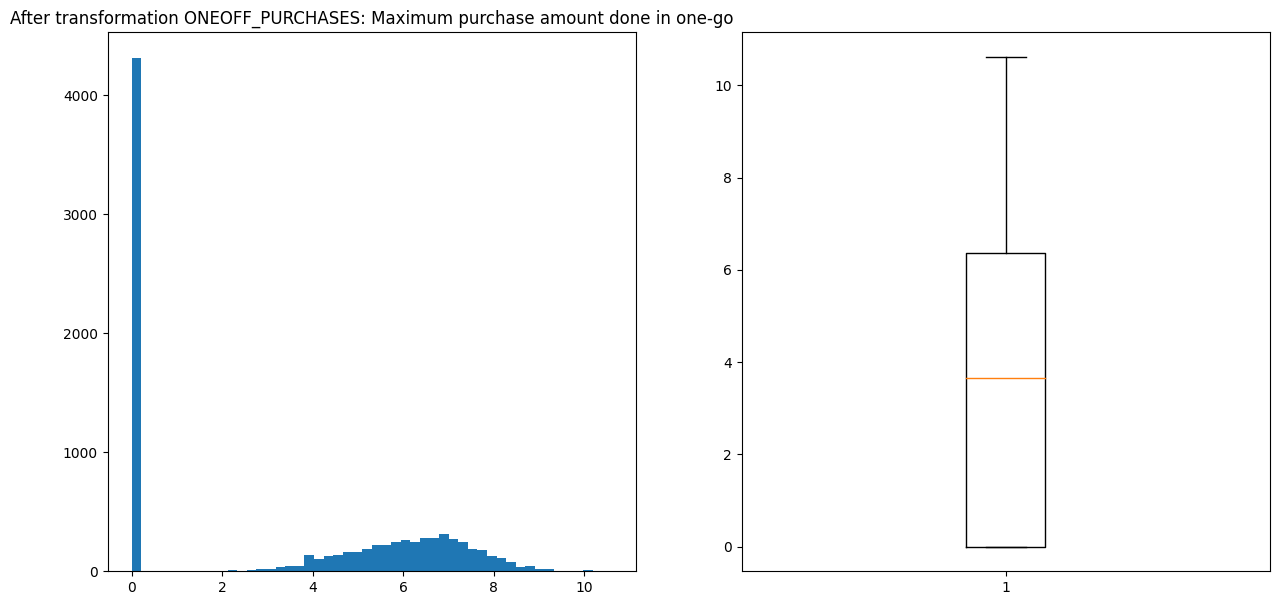

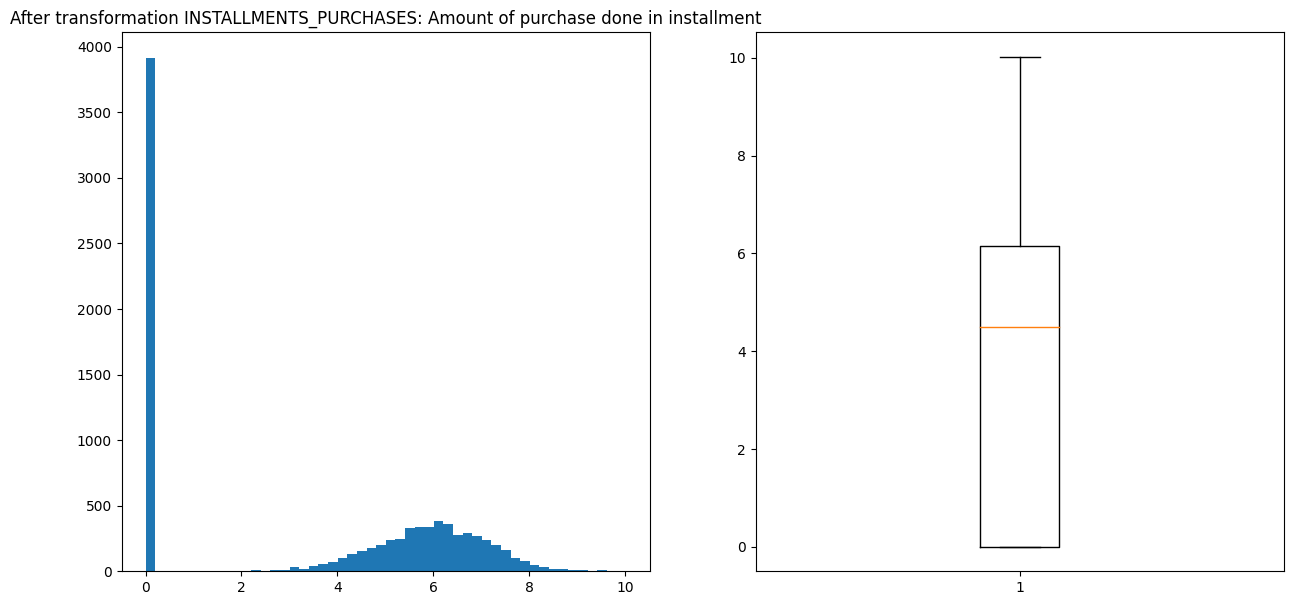

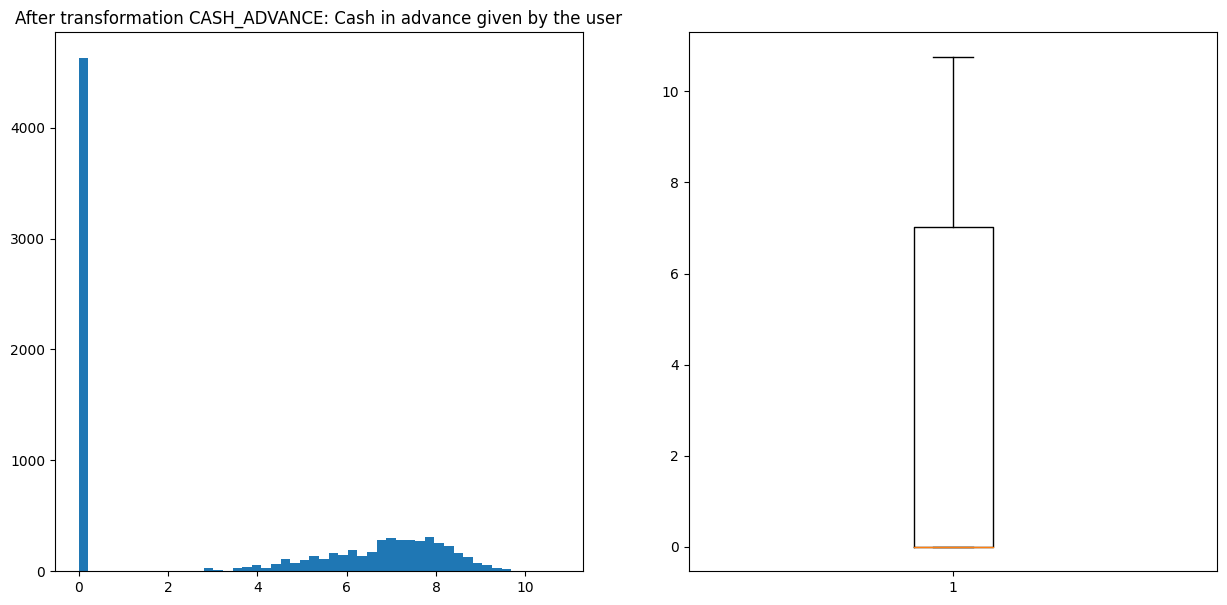

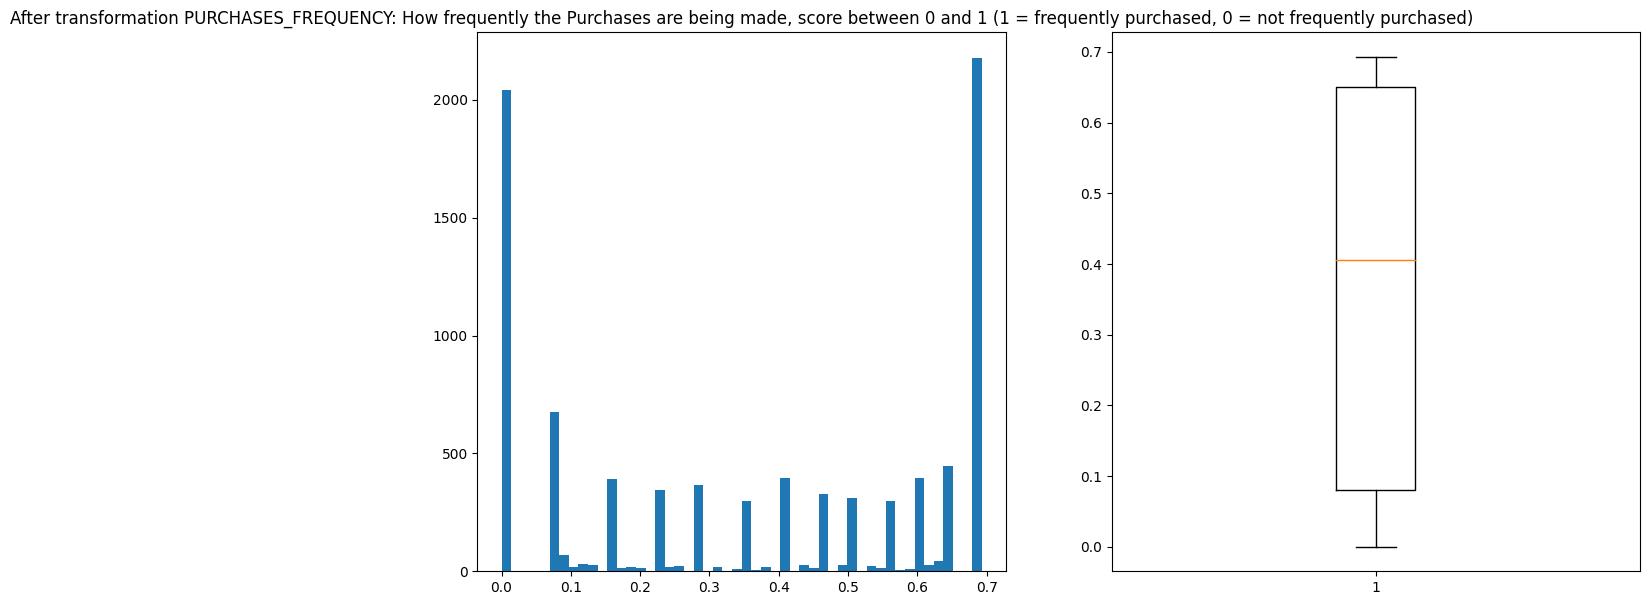

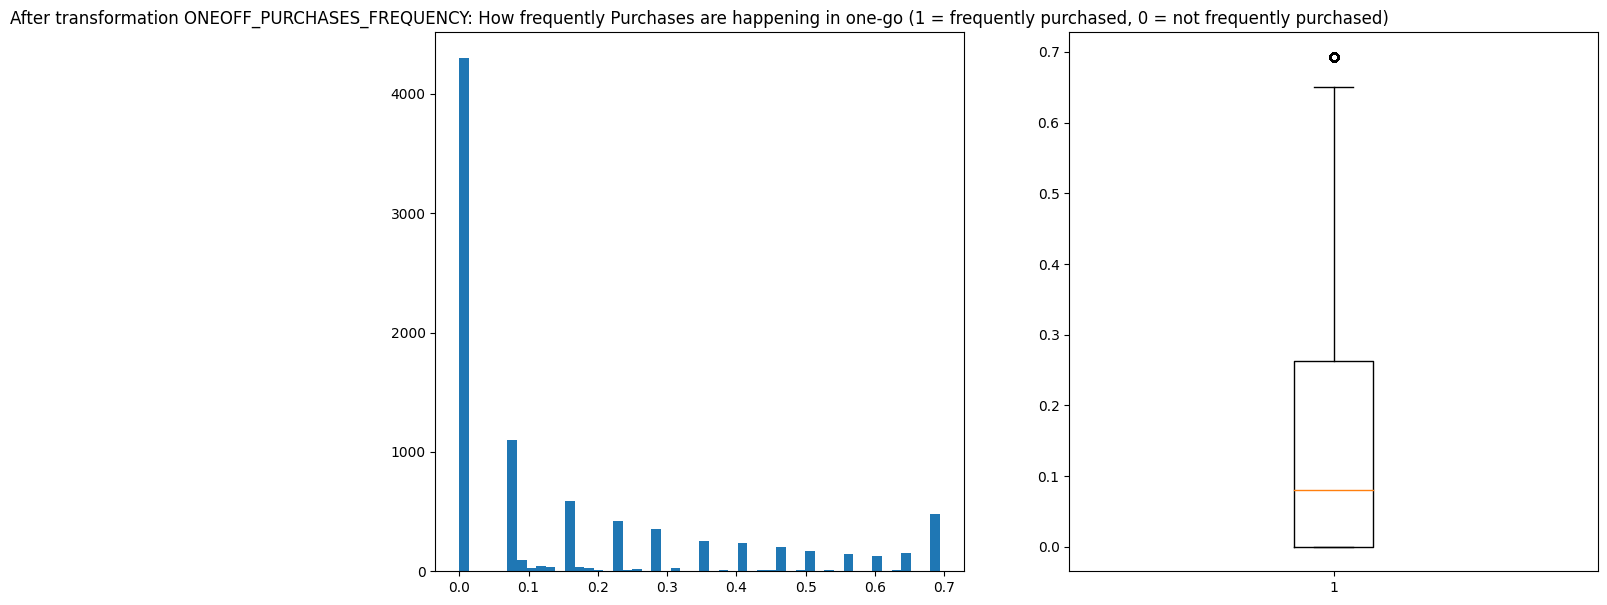

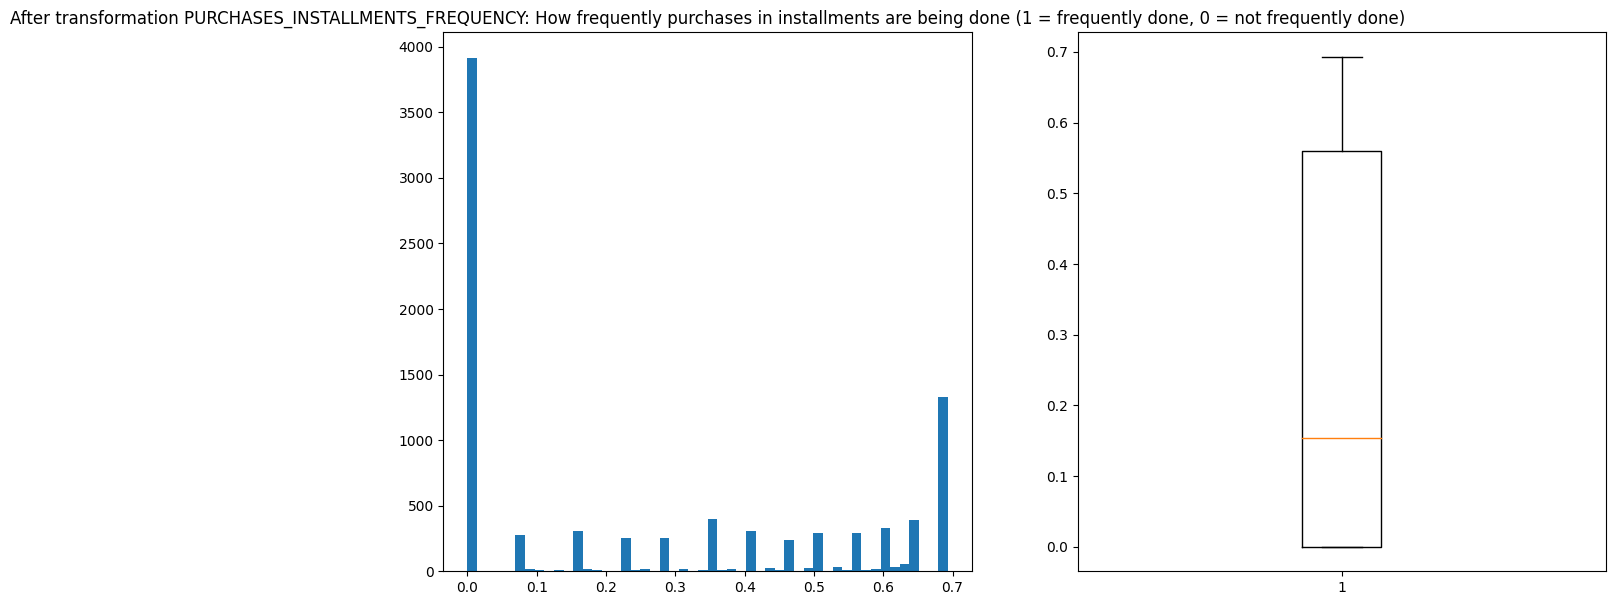

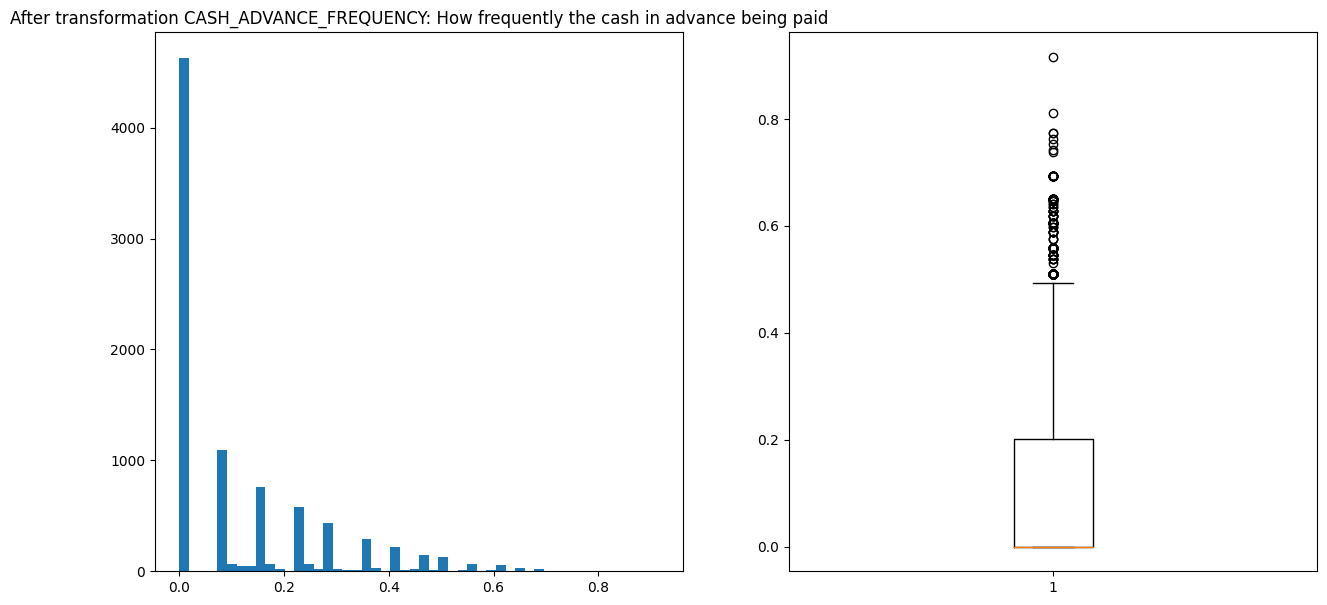

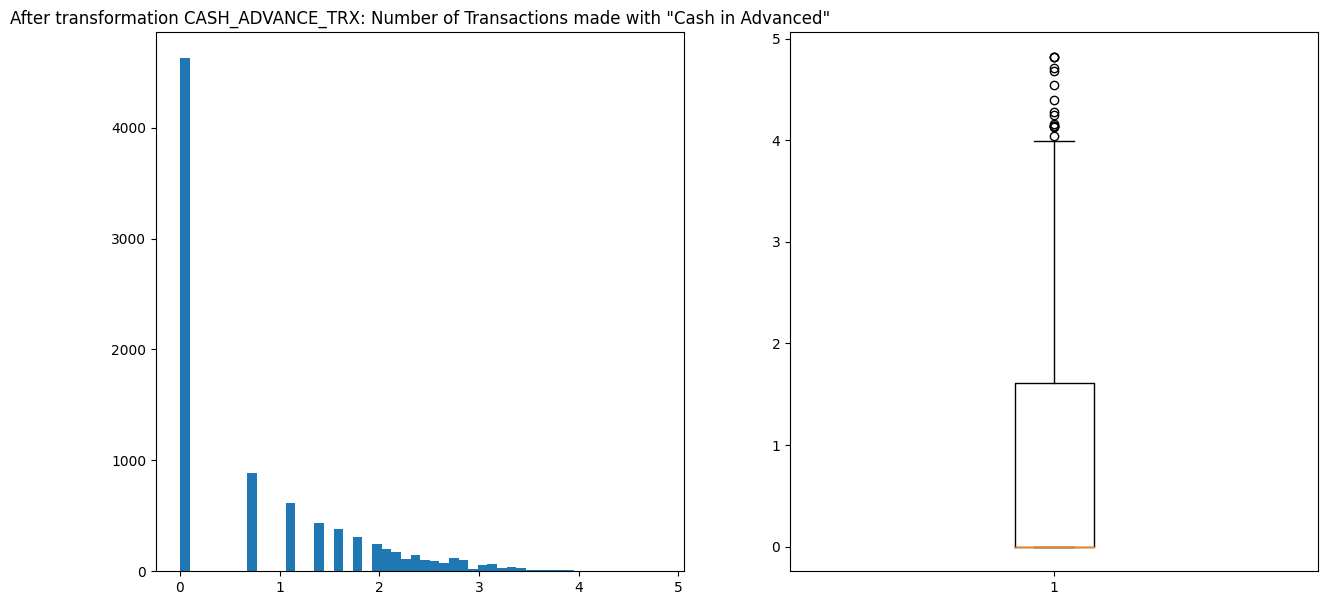

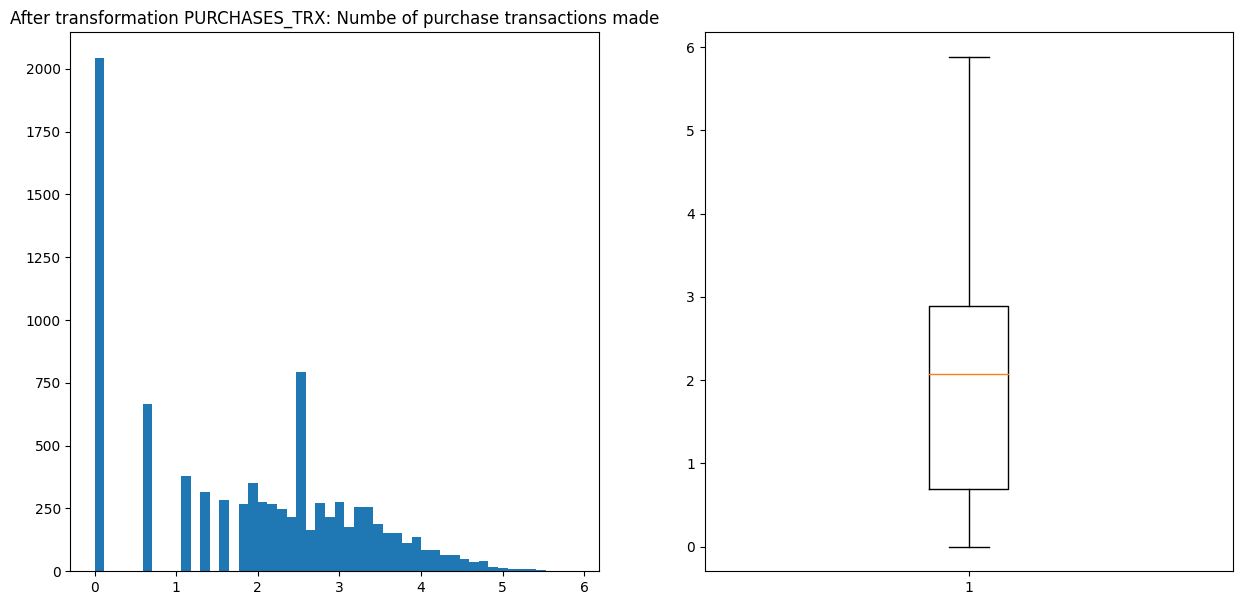

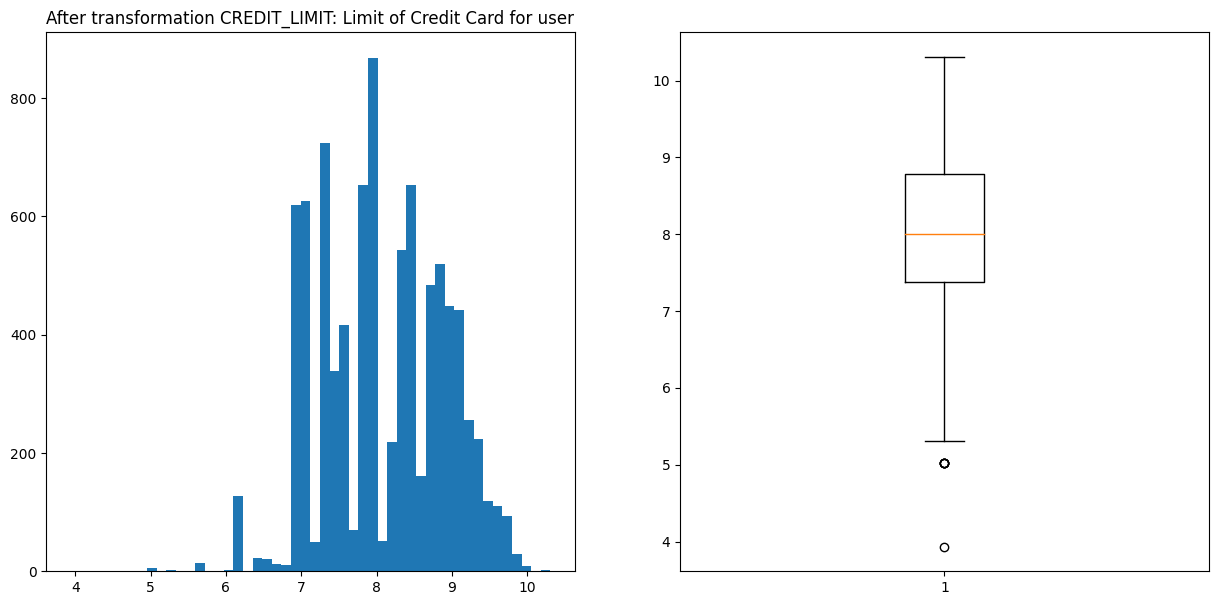

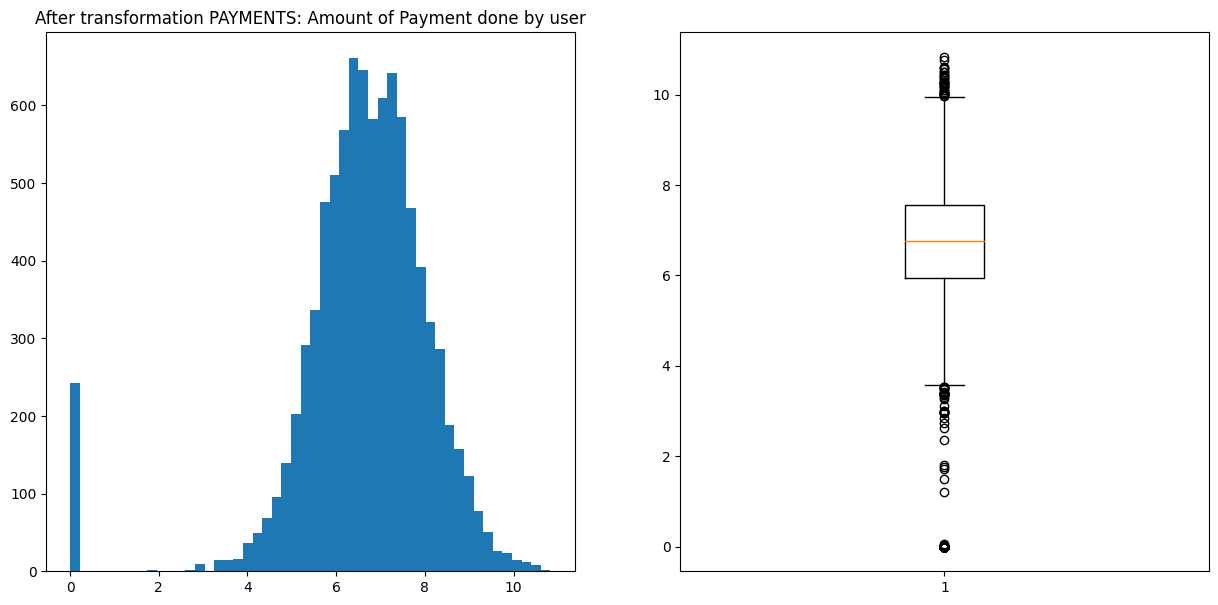

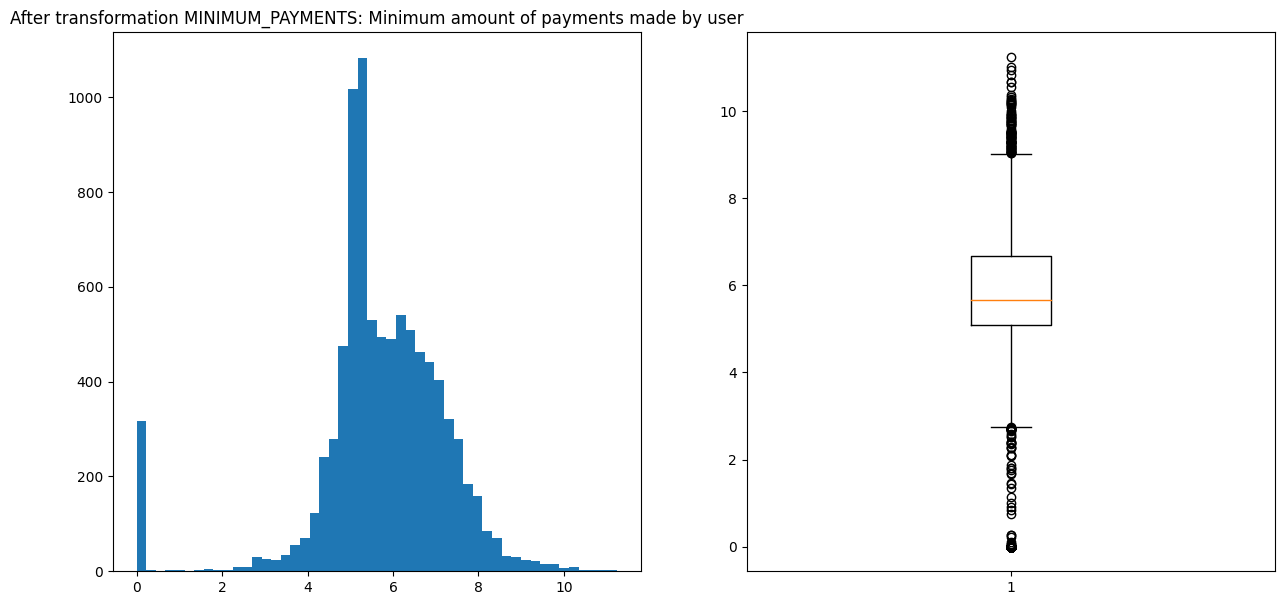

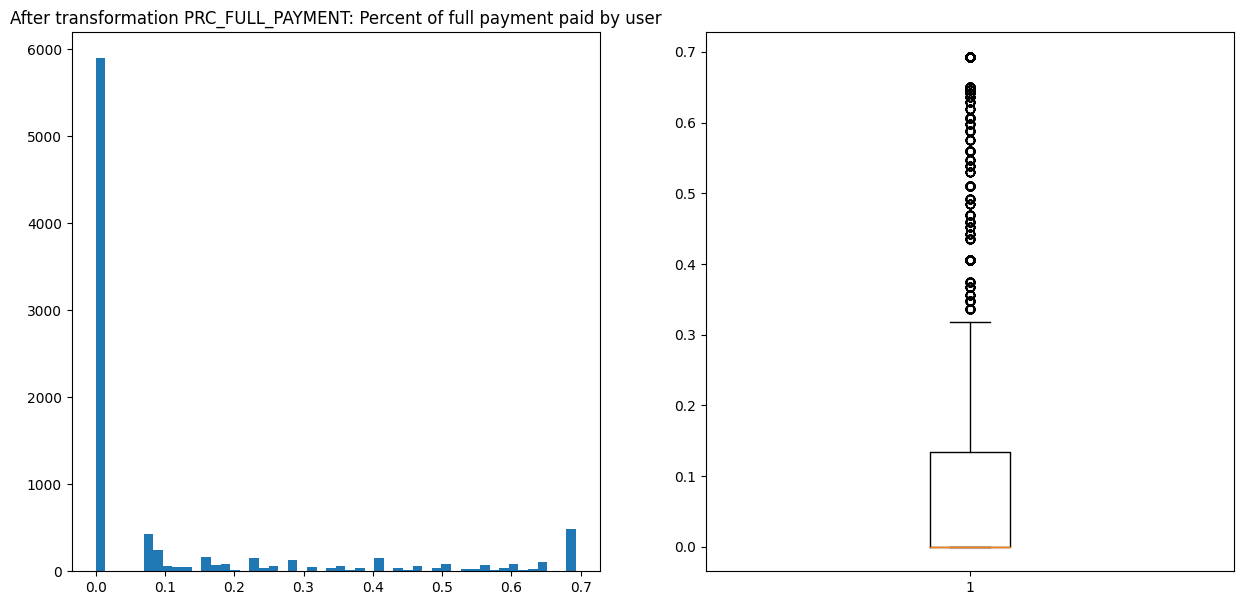

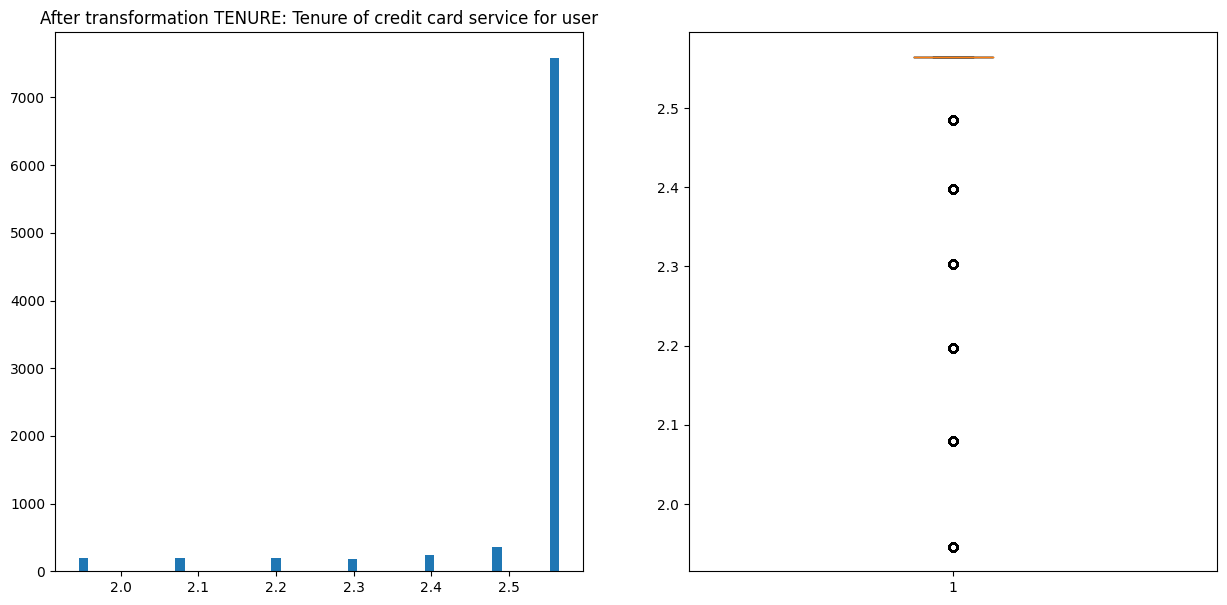

In [38]:
#distibution
columns=['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES',
         'INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY',
         'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT',
         'PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']

discriptions=['Balance amount left in their account to make purchases',
            'How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)',
            'Amount of purchases made from account',
            'Maximum purchase amount done in one-go',
            'Amount of purchase done in installment',
            'Cash in advance given by the user',
            'How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)',
            'How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)',
            'How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)',
            'How frequently the cash in advance being paid',
            'Number of Transactions made with "Cash in Advanced"',
            'Numbe of purchase transactions made',
            'Limit of Credit Card for user',
            'Amount of Payment done by user',
            'Minimum amount of payments made by user',
            'Percent of full payment paid by user',
            'Tenure of credit card service for user']
for i in range(len(columns)):
    plt.figure(figsize=(15,7))
    #distribution
    plt.subplot(1, 2, 1)
    plt.title("After transformation "+columns[i]+": "+discriptions[i])
    plt.hist(df[i],50)
    #check for outliers
    plt.subplot(1, 2, 2)
    plt.boxplot(df[i])
    plt.show()

# Kmeans

# 1- Choose K

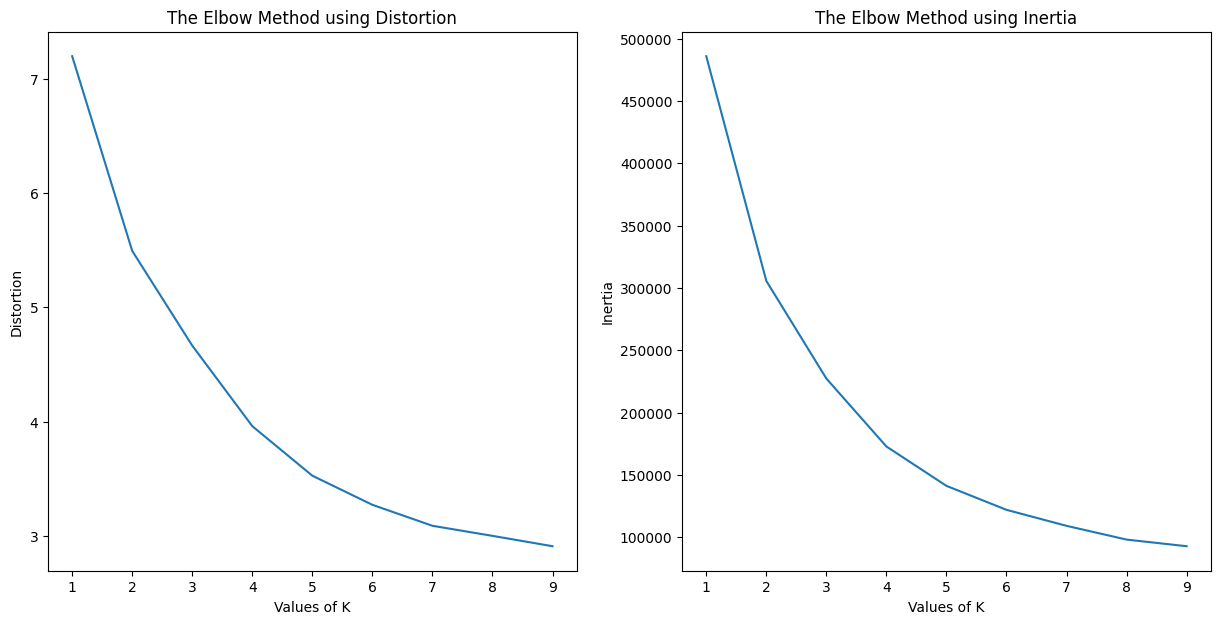

In [39]:
#using elbow method
distortions = []
inertias = []
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, n_init=10, max_iter=100, random_state=42)
    kmeanModel.fit(df)

    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)


plt.figure(figsize=(15,7))

plt.subplot(1, 2, 1)
plt.plot(K, distortions)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')

plt.subplot(1, 2, 2)
plt.plot(K, inertias)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')

plt.show()

Silhouette Score for K=  2  is  0.361350543249596
Silhouette Score for K=  3  is  0.3720122625458334
Silhouette Score for K=  4  is  0.3945350893575041
Silhouette Score for K=  5  is  0.41804694123823294
Silhouette Score for K=  6  is  0.43047441959620386
Silhouette Score for K=  7  is  0.4484118019003554
Silhouette Score for K=  8  is  0.4583819197769146
Silhouette Score for K=  9  is  0.4064157161118855


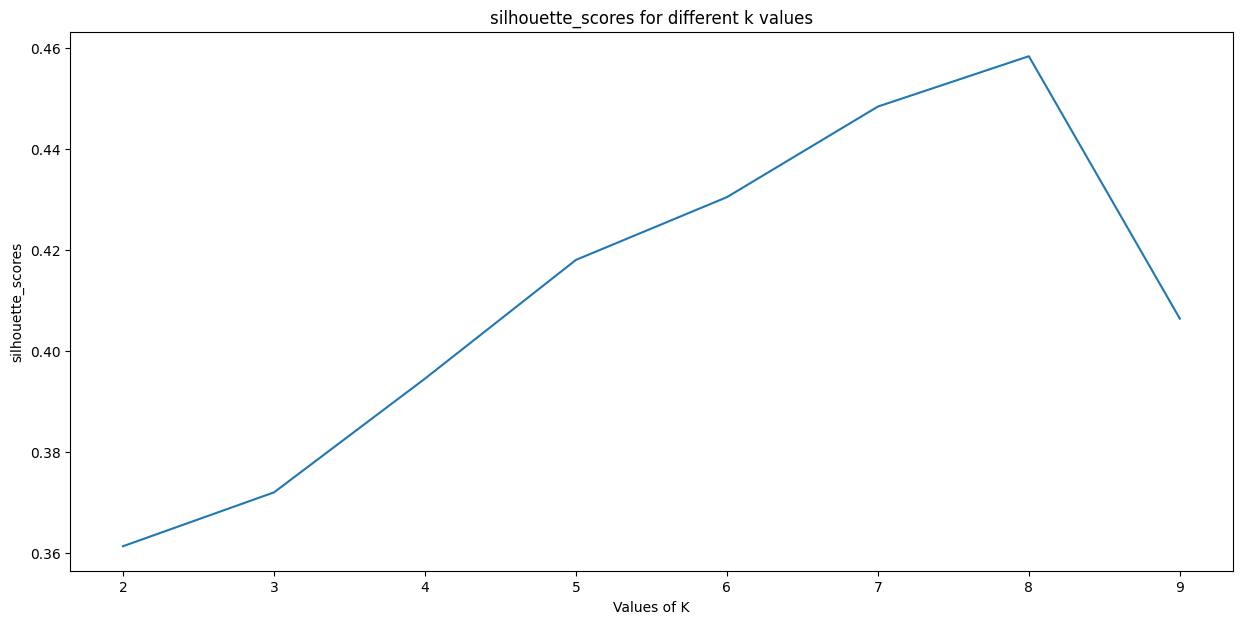

In [40]:
#using silhouette_score
K = range(2, 10)
scores=[]
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, n_init=10, max_iter=100, random_state=42).fit(df)
    labels = kmeanModel.fit_predict(df)
    score = silhouette_score(df, labels)
    scores.append(score)
    print("Silhouette Score for K= ",k," is ",score)

plt.figure(figsize=(15,7))
plt.plot(K, scores)
plt.xlabel('Values of K')
plt.ylabel('silhouette_scores')
plt.title('silhouette_scores for different k values')
plt.show()

In [41]:
K=7

In [42]:
#my k_means
def kMeansInitCentroids(X, K):
    """
    This function initializes K centroids that are to be used in K-means on the dataset x.

    Parameters
    ----------
    X : array_like
        The dataset of size (m x n).

    K : int
        The number of clusters.

    Returns
    -------
    centroids : array_like
        Centroids of the clusters. This is a matrix of size (K x n).

    Instructions
    ------------
    You should set centroids to randomly chosen examples from the dataset X.
    """
    random_indices = np.random.choice(X.shape[0], size=K)
    centroids =X[random_indices, :]

    return centroids


def findClosestCentroids(X, centroids):
    """
    Computes the centroid memberships for every example.

    Parameters
    ----------
    X : array_like
        The dataset of size (m, n) where each row is a single example.
        That is, we have m examples each of n dimensions.

    centroids : array_like
        The k-means centroids of size (K, n). K is the number
        of clusters, and n is the the data dimension.

    Returns
    -------
    idx : array_like
        A vector of size (m, ) which holds the centroids assignment for each
        example (row) in the dataset X.

    Instructions
    ------------
    Go over every example, find its closest centroid, and store
    the index inside `idx` at the appropriate location.
    Concretely, idx[i] should contain the index of the centroid
    closest to example i. Hence, it should be a value in the
    range 0..K-1

    """


    distances=np.sqrt(np.sum(np.square(X - centroids[0]),axis=1)).reshape(-1,1)
#     print(distances.shape)
    for c in range(1,len(centroids)):
        dist=np.sqrt(np.sum(np.square(X - centroids[c]),axis=1)).reshape(-1,1)
        distances=np.concatenate([distances, dist], axis=1)
        idx=np.argmin(distances,axis=1)

    return idx


def computeCentroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points
    assigned to each centroid.

    Parameters
    ----------
    X : array_like
        The datset where each row is a single data point. That is, it
        is a matrix of size (m, n) where there are m datapoints each
        having n dimensions.

    idx : array_like
        A vector (size m) of centroid assignments (i.e. each entry in range [0 ... K-1])
        for each example.

    K : int
        Number of clusters

    Returns
    -------
    centroids : array_like
        A matrix of size (K, n) where each row is the mean of the data
        points assigned to it.

    Instructions
    ------------
    Go over every centroid and compute mean of all points that
    belong to it. Concretely, the row vector centroids[i, :]
    should contain the mean of the data points assigned to
    cluster i.

    Note:
    -----
    You can use a for-loop over the centroids to compute this.
    """
    centroids=[]
    for center in range(K):
        #get points belongs to this center
        points=X[idx==center]
        #get mean for these points:
        mean=points.mean(axis=0).reshape(1,-1)
        centroids.append(mean)

    return centroids

#k_means
def k_means(X,K):
    #choose intial centroids
    centroids = kMeansInitCentroids(X, K)
    for i in range(100):
        #assign each point to the closest centroid
        idx = findClosestCentroids(X, centroids)
        #recalculate the new centroids
        computeCentroids(X, idx, K)

    return centroids, idx

In [43]:
df=np.array(df)

In [44]:
#try it 10 times and get the best with min inertia
min_inertia=None
r_centroids=None
r_idx=None
for i in range(10):
    centroids, idx=k_means(df,K)
    distances=[]
    for i in range(len(idx)):
        distances.append(np.linalg.norm(df[i] - centroids[idx[i]]))
    inertia=np.sum(np.square(distances))
    if min_inertia==None or inertia<=min_inertia:
        min_inertia=inertia
        r_centroids=centroids
        r_idx=idx

centroids=r_centroids
idx=r_idx

In [45]:
#kmeans from sklearn
kmeans = KMeans(n_clusters=K, n_init= 10,max_iter=100).fit(df)
kmeans

KMeans(max_iter=100, n_clusters=7, n_init=10)

In [46]:
#evaluating using Inertia or Sum of Squared Distances
#my algorithm
distances=[]
for i in range(len(idx)):
    distances.append(np.linalg.norm(df[i] - centroids[idx[i]]))

inertia=np.sum(np.square(distances))
print("inertia for my k-means= ",inertia)

#Kmeans from sklearn
inertia = kmeans.inertia_
print("inertia for Kmeans from sklearns= ",inertia)

inertia for my k-means=  194444.0038590249
inertia for Kmeans from sklearns=  109191.45597632599


In [47]:
#evaluating using silhouette_score
#my algorithm
score = silhouette_score(df, idx)
print("Silhouette Score for my k_means= ",score)

#Kmeans from sklearn
labels = kmeans.fit_predict(df)
score = silhouette_score(df, labels)
print("Silhouette Score for Kmeans from sklearns= ",score)


Silhouette Score for my k_means=  0.3811439927697368
Silhouette Score for Kmeans from sklearns=  0.4484118019003554


# Visualize

# PCA

In [48]:
pca = PCA(n_components=2)
df_reduces=pca.fit_transform(df)
#plot clusters

pca_fig = px.scatter(
    x = df_reduces[:, 0],
    y = df_reduces[:, 1],
    color = labels,
    title = "PCA Cluster Visualization "
)
pca_fig.show()

# tsne

In [49]:
df_reduces = TSNE(n_components=2).fit_transform(df)
tsne_fig = px.scatter(
    x = df_reduces[:, 0],
    y = df_reduces[:, 1],
    color = labels,
    title = "TSNE Cluster Visualization "
)
tsne_fig.show()

#  DBSCAN

In [50]:
DBSCAN_cluster = DBSCAN(eps=2, min_samples=5).fit(df)
labels=DBSCAN_cluster.labels_
score = silhouette_score(df, labels)
print("Silhouette Score for DBSCAN from sklearns= ",score)


Silhouette Score for DBSCAN from sklearns=  0.43217867492718076


In [51]:
df_reduces = TSNE(n_components=2).fit_transform(df)
DBSCAN_fig = px.scatter(
    x = df_reduces[:, 0],
    y = df_reduces[:, 1],
    color = labels,
    title = "DBSCAN Cluster Visualization "
)
DBSCAN_fig.show()

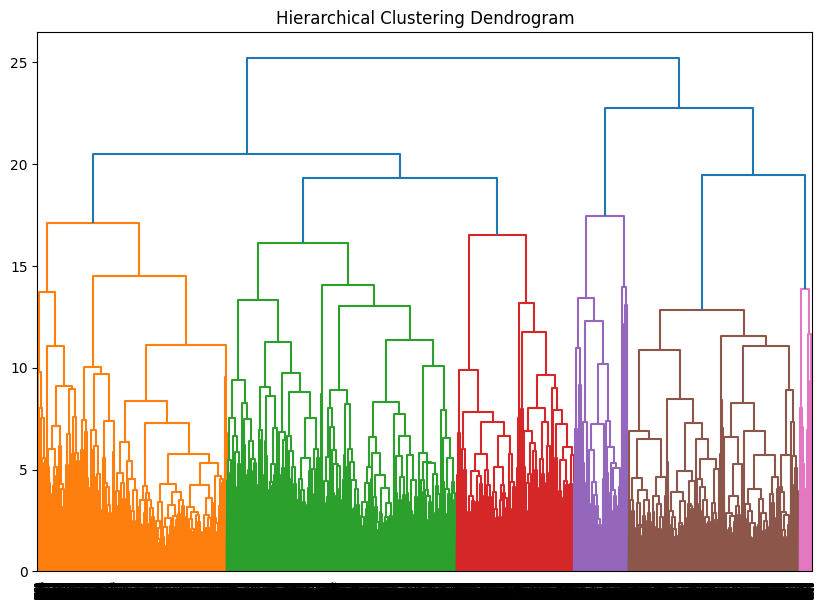

In [53]:
#using dendrogram
linkage_methods = ['complete', 'single', 'average', 'centroid']
distance_metrics = ['euclidean', 'cityblock', 'mahalanobis']

plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dend = dendrogram(linkage(df, method=linkage_methods[0],metric=distance_metrics[0]))
plt.show()